# AULA 4 DEMONSTRAÇÃO 1- Redes Convolucionais


Aula 4- Aula Assíncrona
https://www.youtube.com/watch?v=sbSUzcoPmEg&ab_channel=MoacirAntonelliPonti

---

## PyTorch introdução à Dataset e DataLoader

- utilizar o minist como exemnplo de dataset

---

In [90]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor

from torch.utils.data import DataLoader

Podemos carregar um dataset já existente, utilizando os seguintes parâmetros:
- `root`: caminho onde os dados serão armazenados localmente
- `train`: variável binária que define se carregar os dados de treinamento (`True`) o teste (`False`)
- `download`: se `True` faz download da Internet caso os dados não estejam disponíveis localmente
- `transform` e `target_transform` especifica transformações para as features e labels.

In [91]:
training_data = FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

* cada posição é uma tupla com 2 elementos: **features (imagens nesse caso) e o rótulo da classe**
    * abaixo: vemos que a posição 0 é uma tupla, com uma imagem 28z28 e 1 canal de cor na primeira posição e a classe 9 dela

In [92]:
type(training_data[0]), training_data[0][0].shape, training_data[0][1]

(tuple, torch.Size([1, 28, 28]), 9)

- ver alguns itens aleatórios de algumas posições aleatórios (escala grey)
    * classificação dos números em palavras

In [93]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

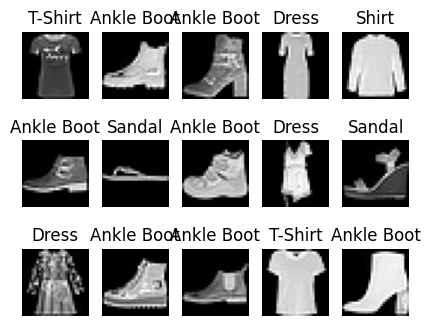

In [94]:
figure = plt.figure(figsize=(5, 4))
cols, rows = 5, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

---

### Dataloader

- É uma classe que combina um dataset com um amostrador, provendo uma forma de iterar sobre o dataset:
    - por mini-batches
    - com opção de aleatorizar


In [95]:
train_dataloader = DataLoader(training_data, batch_size=2, shuffle=True)

# iter itera sobre o dataloader
train_dataloader, iter(train_dataloader) 

(<torch.utils.data.dataloader.DataLoader at 0x1ae54634be0>,
 <torch.utils.data.dataloader._SingleProcessDataLoaderIter at 0x1ae54516b20>)

In [96]:
# com next podemos pegar o proximo batch via iterador
next(iter(train_dataloader))

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]]]),
 tensor([9, 7])]

In [97]:
next(iter(train_dataloader))[0][0].shape, next(iter(train_dataloader))[1][0] # imagem e rótulo

(torch.Size([1, 28, 28]), tensor(1))

Feature batch shape: torch.Size([2, 1, 28, 28])
Labels batch shape: torch.Size([2])



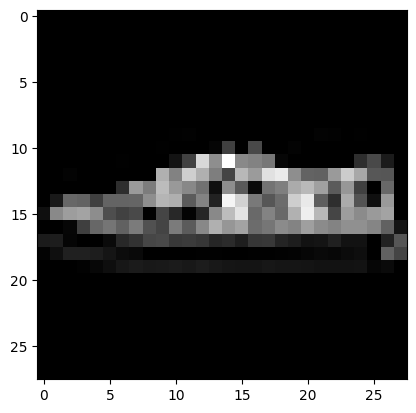

Label: Sneaker


In [98]:
train_features, train_labels = next(iter(train_dataloader))
print(f'Feature batch shape: {train_features.size()}')
print(f'Labels batch shape: {train_labels.size()}\n')
img = train_features[0].squeeze()
label = train_labels[0].item()
plt.imshow(img, cmap='gray')
plt.show()
print(f'Label: {labels_map[label]}')